## Table of contents:

1. [Working with OPenCv on Digits data](#Introduction)
2. [Transfer learning(Dog Breed classifier)](#Mobilenet)


<a name="Introduction"></a>

## 1.Working with openCv on Digits Data

In [2]:
import cv2
import numpy as np
import pandas as pd


In [33]:
input_data=pd.read_csv("train.csv")
input_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#creating two datafrmaes storing pixel values X,the other storint the actual number y
y=input_data['label']
input_data.drop('label',axis=1,inplace=True)
X=input_data
X.shape

(42000, 784)

In [35]:
##converting the labels present into dummies
y=pd.Categorical(y)
y

[1, 0, 1, 4, 0, ..., 0, 1, 7, 6, 9]
Length: 42000
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
logreg=LogisticRegression()
dt=DecisionTreeClassifier()
svc=LinearSVC()

In [37]:
model_logreg=logreg.fit(X,y)
model_dt=dt.fit(X,y)
model_svc=svc.fit(X,y)

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
#testing th new data
x_test=pd.read_csv("test.csv")
pred_logreg=model_logreg.predict(x_test)
pred_dt=model_dt.predict(x_test)
pred_svc=model_svc.predict(x_test)
x_test.shape

(28000, 784)

### checking the accuracy of the trained model

In [39]:
# from sklearn.metrics import accuracy_score
# pred1=model_logreg.predict(x_test)
# pred2=model_dt.predict(x_test)
# pred3=model_svc.predict(x_test)

# print("Logistic Regression accuracy is:",accuracy_score(pred1,y)*100)
# print("Decision Tree accuracy is:",accuracy_score(pred2,y)*100)
# print("Support Vector Machine Accuracy is:",accuracy_score(pred3,y)*100)



### face detection in an image

In [100]:
import cv2
import matplotlib.pyplot as plt


In [101]:
img=cv2.imread("babyface.jpg")
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("Original_grayscale_image",gray_img)
cv2.waitKey(0)


-1

In [5]:
haar_face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces=haar_face_cascade.detectMultiScale(gray_img,scaleFactor=1.1,minNeighbors=5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
cv2.imshow("Final_detected_image",cv2.COLOR_BGR2RGB(img))
cv2.waitKey(0)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [6]:
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = haar_face_cascade.detectMultiScale(gray_img,scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in faces:
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2.imshow("Final_detected_image",cv2.COLOR_BGR2RGB(img))
cv2.waitKey(0)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


<a name="Mobilenet"></a>

## 2. Transfer learning(Dog Breed classifier)

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np

In [5]:
#checking the labels dataset
labels=pd.read_csv("labels.csv")
labels.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<Axes: >

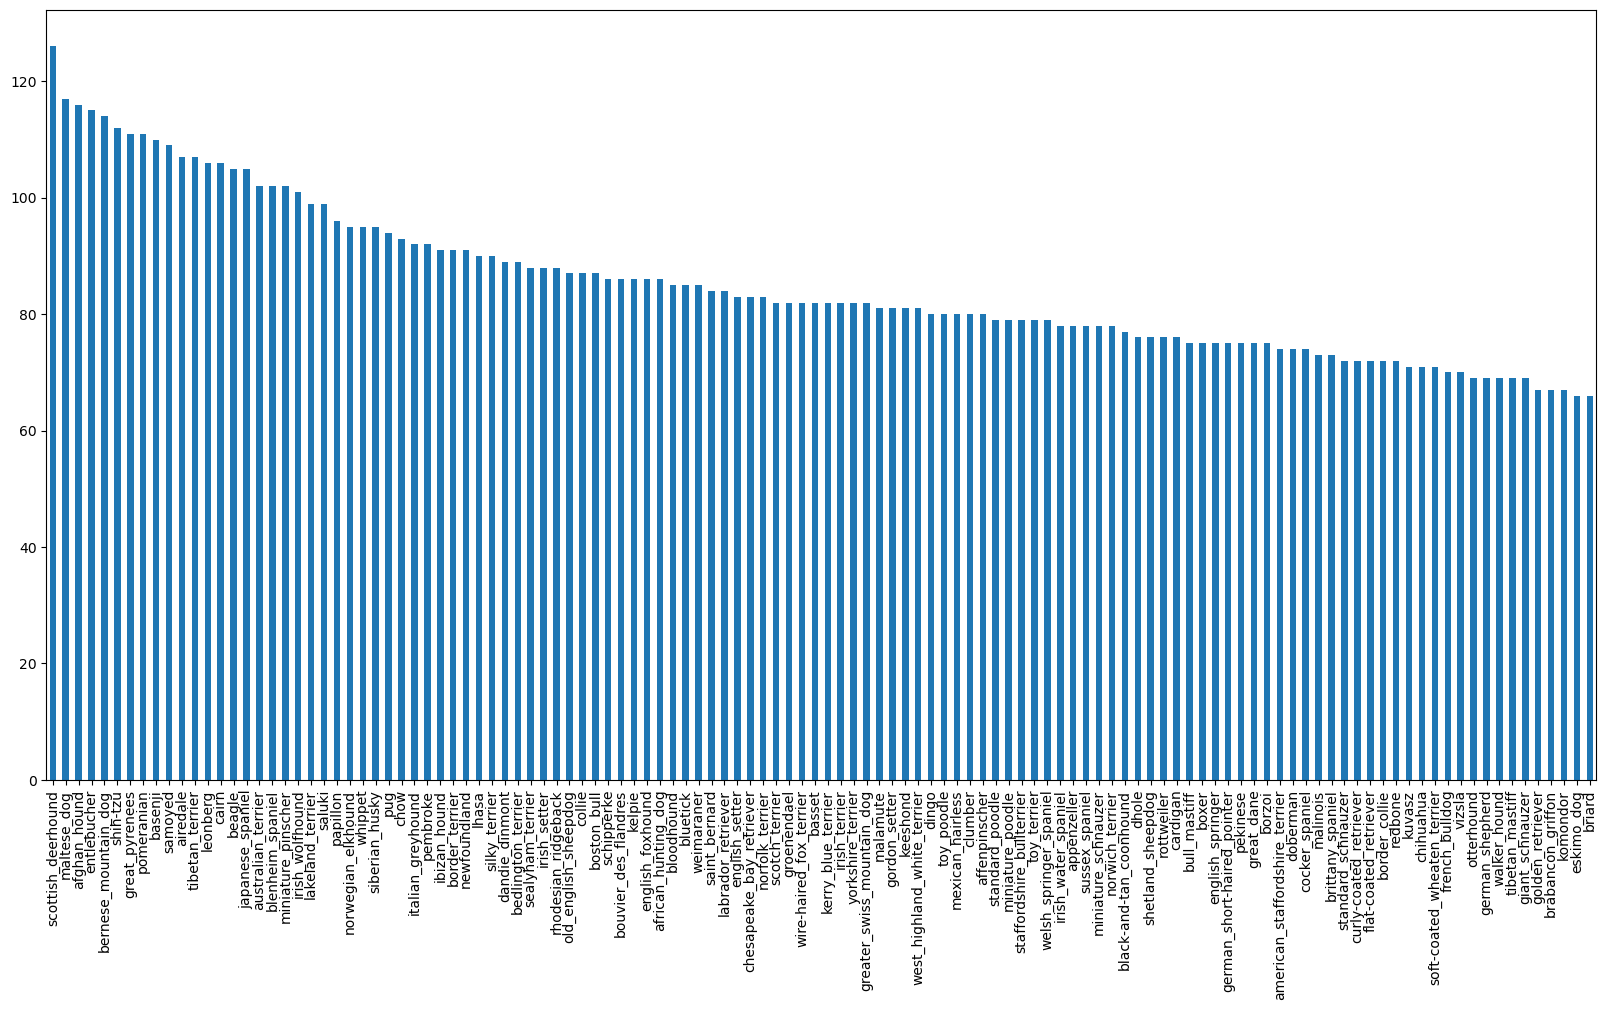

In [7]:
#checking how many images of each breed are present in the dataset
labels["breed"].value_counts().plot.bar(figsize=(20,10))

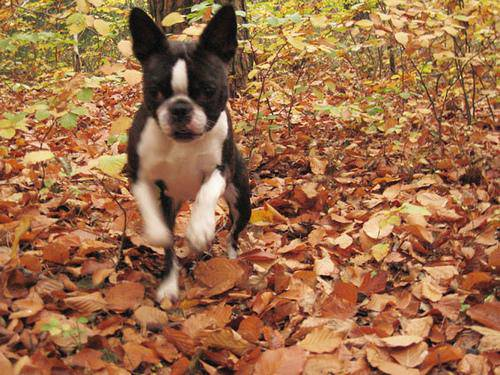

In [8]:
#Printing a samole image
from IPython.display import display,Image
Image("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Setting up images and labels

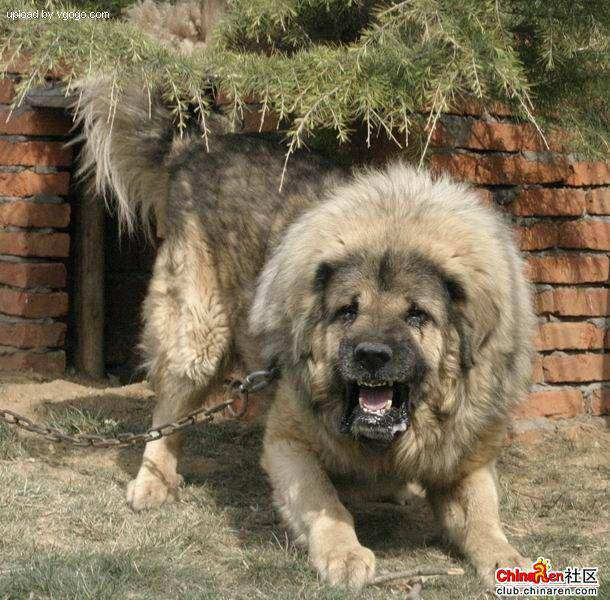

In [9]:
#define our file training path
train_path="train"

#Create path names from ID's
filenames=[train_path+'/'+fname+".jpg" for fname in labels["id"]]

#checking image directly from file path
Image(filenames[9000])

In [10]:
#Reading and conversion of labels into numpy array
labels_np=labels["breed"].to_numpy()

#extracting the unique values of the labels dataset
unique_breeds=np.unique(labels_np)
len(unique_breeds)

120

In [11]:
#printing out the 120 unique breeds
list(unique_breeds)

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [12]:
#encoding the target labels with values between 0 and 120
from sklearn.preprocessing import LabelEncoder
labels=LabelEncoder().fit_transform(labels_np).reshape(-1,1)
labels.shape

(10222, 1)

In [13]:
#using One hot encoding to transform categorical values
#conversion of labels into boolean
from sklearn.preprocessing import OneHotEncoder
boolean_labels=OneHotEncoder().fit_transform(labels).toarray()
boolean_labels[5]
boolean_labels.shape

(10222, 120)

### Processing images

In [14]:
'''
For this we must read the image data and convert it to a format suitable for inputing to the model
The data is represented in form of Tensors for faster processing using GPUs
1.Take file name as input
2.Load image(a jpeg file) in its binary format
3.Turn the image data into Tensors
4.Resize the image to be shape (224,224)
5.Return the image Tensor ie.MobileNet nodelrequires an input image shape(224,224,3),3 rep dimenssins of RGB
'''


'\nFor this we must read the image data and convert it to a format suitable for inputing to the model\nThe data is represented in form of Tensors for faster processing using GPUs\n1.Take file name as input\n2.Load image(a jpeg file) in its binary format\n3.Turn the image data into Tensors\n4.Resize the image to be shape (224,224)\n5.Return the image Tensor ie.MobileNet nodelrequires an input image shape(224,224,3),3 rep dimenssins of RGB\n'

In [15]:
#setup variables
X=filenames
y=boolean_labels
# print(X.shape)
# print(y.shape)
print(len(X))
len(y)

10222


10222

In [42]:
#spliting the Training dataset into Training and validation
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train))
print(len(X_val))
print(len(y_train))
print(len(y_val))


8177
2045
8177
2045


In [17]:
#Define image size
IMG_SIZE=224

def process_image(image_path):
    '''
    Takes image path and converts it to a tensor
    '''
    #Read image file
    image=tf.io.read_file(image_path)
    #Turn the jpeg image into numeral Tensor
    image=tf.image.decode_jpeg(image,channels=3)
    #converting the color channel values from 0-225 to 0-1 values
    image=tf.image.convert_image_dtype(image,tf.float32)
    #Resize the image to desired size of (224,224)
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    return image

#### Associating images to labels

In [18]:
'''This creates a simple function to return a tuple (image,label)'''

def get_image_label(image_path,label):
    image=process_image(image_path)
    return image,label

#### Creating Data batches
A batch is a small portion of your data images and their labels ie.A batch of 32 pictures has 32 labels

In DL instead of finding patterns in entire dataset at the same time ,you often find them in one batch at a time

In [40]:
#defining a batch size of 32 by default
BATCH_SIZE=32

def create_data_batches(x,y=None,batch_size=BATCH_SIZE,data_type=1):
    '''
    Creates batches of data out of img(x) and label(y) pairs.
    Shuffles the data if its Training data but doesn't shuffle it if its validation data
    Also accepts test data as input(no labels)
    '''
    #if the data is a test dataset,we dont have labels
    if data_type==3:
        print("Creating test data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        #only file paths
        data_batch=data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    #If the data is a valid dataset,we don't need to shuffle it
    elif data_type==2:
        print("Creating validation data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x) #filepaths
                                                 ,tf.constant(y))) #labels
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        #if the data is training datset,we shuffle it
        print("Creating training data batches...")
        #Turn filepaths and labels into Tensors
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),#filepaths
                                                tf.constant(y)))#labels
        #shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data=data.shuffle(buffer_size=len(x))
        
        #Create (image,label) tuples
        #(this also turns the image path into a processed image)
        data=data.map(get_image_label)
        
        #Turn the data into batches
        data_batch=data.batch(BATCH_SIZE)
        return data_batch
    
        
    

### Display function for images


In [46]:
import matplotlib.pyplot as plt

def show_25_images(images,labels):
    '''
    Displays 25 images from  a data batch
    '''
    #setting up the figure
    plt.figure(figsize=(10,10))
    #Looping through 25 images
    
    for i in range(25):
        #create subplots(5 rows,5 columns)
        ax=plt.subplot(5,5,i+1)
        # didplay an image
        plt.imshow(images[i])
        #Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        #Turn grid lines off
        plt.axis("off")

### Defining Model
To define our model we need 3 importnat pieces of information

* The input shape(images, in the form of Tensors)
* The desired number of classes(number of dog breeds)
* The URL of the pre-trained model that we want to use


In [32]:
#setting up the input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] #batch,height,width,color channels

#Setup output shape of the maodel
OUTPUT_SHAPE=len(unique_breeds) #no. of unique labels

#setup  model URL from Tensorflow Hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [36]:
def create_model(input_shape=INPUT_SHAPE,output=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("Building model with:",MODEL_URL)
    
    # Using sequential API to define two layers in our model
    #Seting up model layers
    '''
    The first layer is the entire pre-trained model taken from the hub
    The second layer is the softmax classification layer that classifies the dogs 
    into 120 categories we are seeking
    '''
    model=tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),#Tensorflow Hub layer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax") #output layer
    ])
    
    # Compile the Model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
    
    #Build model by calling build method that takes the input Tensor as its parametre
    model.build(INPUT_SHAPE)
    
    return model


In [37]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### Creating Datasets

In [43]:
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val)

Creating training data batches...
Creating training data batches...


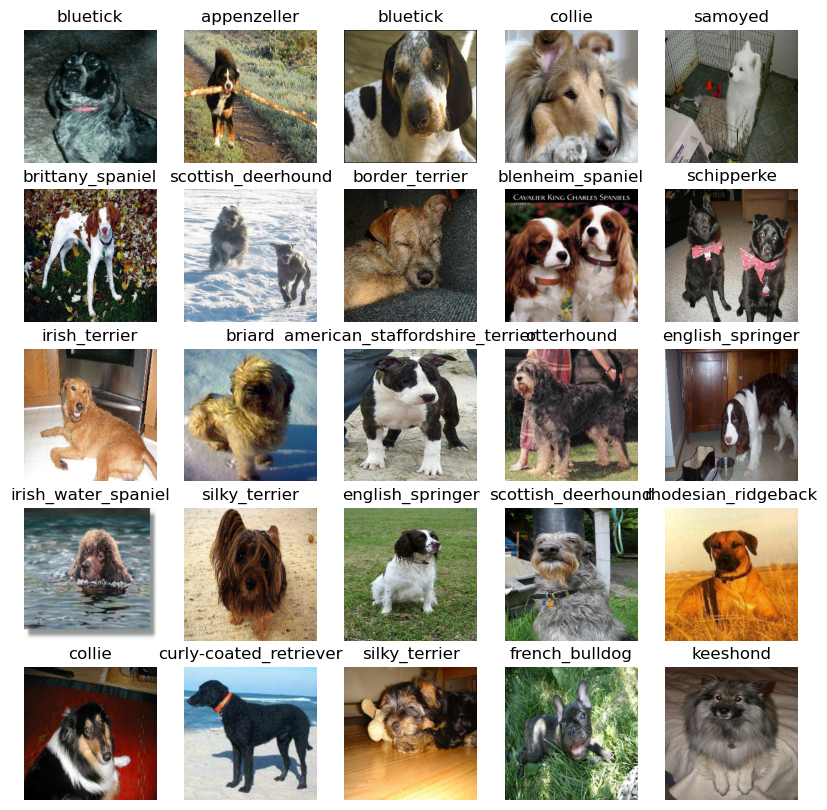

In [47]:
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

### Setting up TensorBoard

In [21]:
%load_ext tensorboard  #loading tensorboard extension

ModuleNotFoundError: No module named 'tensorboard  #loading tensorboard extension'

In [49]:
import datetime
import os

'''The function creates a logs directory and store the currenttime on each log
'''
#Create a function to build a Tensorboard callback
def create_tensorboard_callback():
    #Create a log directory for TensorBoard callback
    logdir=os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)
    

In [52]:
#Tensorboard callback
model_tensorboard=create_tensorboard_callback()

#Early stopping callback
model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)#stps after 3 rounds of no improvements

### Model training

In [53]:
model=create_model()
NUM_EPOCHS=100

model.fit(x=train_data,
         epochs=NUM_EPOCHS,
         validation_data=val_data,
         callbacks=[model_tensorboard,model_early_stopping])

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 366s 1s/step - loss: 1.5130 - accuracy: 0.6353 - val_loss: 0.7093 - val_accuracy: 0.7971
Epoch 2/100
256/256 [==============================] - 339s 1s/step - loss: 0.4183 - accuracy: 0.8799 - val_loss: 0.6517 - val_accuracy: 0.8122
Epoch 3/100
256/256 [==============================] - 346s 1s/step - loss: 0.2405 - accuracy: 0.9375 - val_loss: 0.6526 - val_accuracy: 0.8122
Epoch 4/100
256/256 [==============================] - 335s 1s/step - loss: 0.1513 - accuracy: 0.9667 - val_loss: 0.6594 - val_accuracy: 0.8054
Epoch 5/100
256/256 [==============================] - 339s 1s/step - loss: 0.1025 - accuracy: 0.9826 - val_loss: 0.6603 - val_accuracy: 0.8103
Epoch 6/100
256/256 [==============================] - 336s 1s/step - loss: 0.0723 - accuracy: 0.9906 - val_loss: 0.6572 - val_accuracy: 0.8132
Epoch 7/100
256/256 [======================

#### Examining logs

In [99]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11084), started 1 day, 14:33:32 ago. (Use '!kill 11084' to kill it.)

#### Evaluating model performance

In [55]:
model.evaluate(val_data)

64/64 [==============================] - 76s 1s/step - loss: 0.8825 - accuracy: 0.8078


[0.8824825286865234, 0.8078239560127258]

### Predicting on Test images

In [56]:
#set up path to test images
test_path="test"
test_filenames=[test_path + '/'+fname for fname in os.listdir(test_path)]

#prepare the test dataset
test_data=create_data_batches(test_filenames,data_type=3)

Creating test data batches...


In [57]:
#make predictions
test_predictions=model.predict(test_data,verbose=1)

324/324 [==============================] - 404s 1s/step


In [58]:
test_predictions[0]


array([2.1817512e-10, 2.3395658e-10, 5.2981596e-14, 1.8477208e-12,
       4.8406617e-12, 4.0469184e-11, 5.8264834e-15, 1.9792056e-12,
       2.5163894e-12, 5.2125393e-10, 8.3182013e-13, 7.3554366e-12,
       2.3742664e-13, 2.0245315e-07, 2.4277951e-13, 4.2113544e-12,
       3.6635178e-12, 1.7337249e-12, 3.4678055e-10, 5.9532775e-11,
       5.5510392e-13, 6.4550370e-12, 1.7164024e-11, 8.1178114e-13,
       4.9666933e-13, 1.4937451e-10, 5.4092164e-13, 1.0526800e-14,
       6.9360364e-14, 5.8557964e-11, 7.8982784e-12, 4.3538059e-12,
       6.0274151e-12, 1.2139529e-09, 1.2376189e-14, 5.7412744e-15,
       7.5380422e-12, 3.7661863e-13, 3.4978926e-13, 6.5810212e-08,
       1.2721538e-12, 6.4259448e-13, 4.3118617e-10, 5.8184679e-14,
       7.2216911e-12, 2.5727914e-10, 6.7873436e-13, 7.7870224e-11,
       1.5695932e-10, 1.8720749e-11, 6.2825409e-12, 2.3836115e-11,
       6.0783578e-10, 1.3017925e-13, 1.8880095e-12, 7.3616086e-13,
       1.0689581e-13, 1.0045265e-13, 1.9034573e-11, 8.6367633e

In [60]:
#finding out the maximum probability along with index value at which it occurs using argmax function of numpy
#the max probability value predicted by the model
print(f"Max value:{np.max(test_predictions[0])}")

#index where the max value in pred[0] occurs
print(f"Max index:{np.argmax(test_predictions[0])}")

#the predicted label
print(f"Predicted label:{unique_breeds[np.argmax(test_predictions[0])]}") 


Max value:0.9999738931655884
Max index:61
Predicted label:japanese_spaniel


### Visualizing test Result
visualizing top 10 correctly predicted dog species

In [62]:
def plot_pred(prediction_probabilities,images):
    image=process_image(images)
    pred_label=unique_breeds[np.argmax(prediction_probabilities)]
    plt.imshow(image)
    plt.axis('off')
    plt.title(pred_label)

In [74]:
def plot_pred_conf(prediction_probabilities):
    top_10_indexes=prediction_probabilities.argsort()[-10:][::-1]
    top_10_pred_values=prediction_probabilities[top_10_indexes]
    top_10_labels=unique_breeds[top_10_indexes]
    top_plot=plt.bar(np.arange(len(top_10_labels)),
                    top_10_pred_values,
                    color="grey")
    plt.xticks(np.arange(len(top_10_labels)),
                            rotation="vertical")
    top_plot[0].set_color("green")

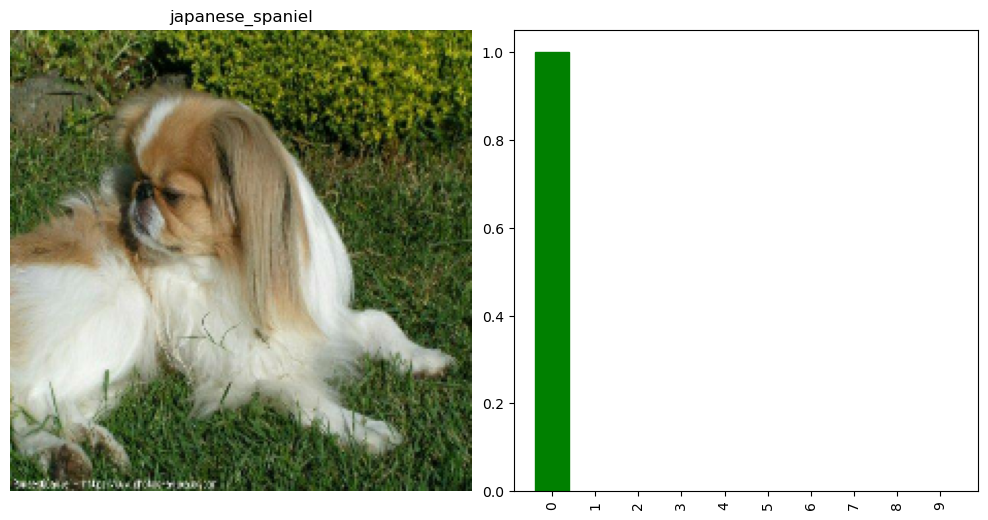

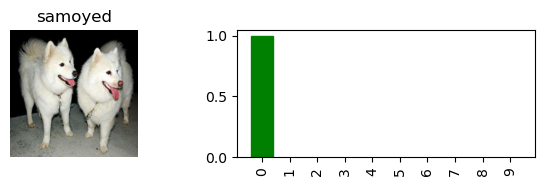

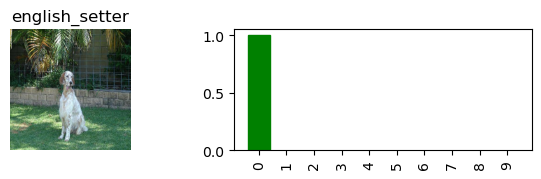

In [75]:
num_rows=3
plt.figure(figsize=(5*2,5*num_rows))
for i in range(num_rows):
    plt.subplot(num_rows,2,2*i+1)
    plot_pred(prediction_probabilities=test_predictions[i],images=test_filenames[i])
    plt.subplot(num_rows,2,2*i+2)
    plot_pred_conf(prediction_probabilities=test_predictions[i])
    plt.tight_layout(h_pad=1.0)
    plt.show()

### Predicting an unknown Image

In [86]:
# url="https://raw.githubusercontent.com/Apress/artificialneural-networks-with-tensorflow-2/main/Ch04/tiger.jpg"

# import wget
# wget.download(url,'tiger.jpg')


In [83]:
#preparing the image for our model
data=create_data_batches(['babyface.jpg'],batch_size=1,data_type=3)

#predicting using model
result=model.predict(data)

Creating test data batches...
1/1 [==============================] - 0s 295ms/step


In [84]:
#getting the predicted class and its name
predict_class_index = np.argmax(result[0],axis=-1)
predict_class_name = unique_breeds[(predict_class_index)]

In [94]:
#getting the model probability by calling predict_prob method on model
# result_proba = model.predict_pro(data,batch_size=None)
# .predict_proba
result_proba=model.predict(data,batch_size=None)
result_proba

1/1 [==============================] - 0s 179ms/step


array([[2.73590995e-04, 3.82630372e-09, 2.45671998e-07, 2.08958431e-06,
        1.32365894e-05, 5.22925880e-09, 3.06391871e-06, 6.76424783e-09,
        6.73844482e-08, 3.28183955e-06, 9.88708848e-07, 1.10927190e-09,
        2.45551723e-06, 2.38610369e-07, 1.77174970e-05, 5.89782871e-07,
        3.51728687e-07, 1.11908957e-06, 1.98770044e-06, 1.37152563e-06,
        2.45529264e-02, 7.34505811e-05, 1.97907707e-06, 8.34576741e-10,
        3.18998609e-05, 6.68913458e-07, 1.77123010e-08, 4.27660234e-05,
        6.94548135e-06, 1.13109127e-02, 2.44091075e-06, 1.31114812e-05,
        1.27834392e-06, 9.04666635e-08, 1.50513797e-05, 1.00297228e-04,
        1.57663708e-05, 7.53500284e-09, 2.15034717e-07, 3.59202027e-01,
        2.23435200e-06, 6.84658996e-10, 1.18514478e-11, 2.93446920e-08,
        1.10366000e-02, 6.79916212e-08, 1.25629333e-06, 1.62648544e-08,
        1.20332341e-04, 5.09952843e-05, 2.92163139e-04, 2.91543278e-09,
        1.29455782e-06, 1.17915757e-01, 9.92966761e-07, 1.141343

In [93]:
'''check the maximum value for the predictions. If this
value is less than a certain threshold, you may conclude that the given
image is not of a dog at all
'''
if result_proba.max() > 0.7:
    print(pred_label)
else:
     print('Not a dog breed as the predicted probability is {}'.
format(result_proba.max()))

Not a dog breed as the predicted probability is 0.3592020273208618


### Saving/Reloading a mode

In [95]:
#saving the model
model.save('model.h5')

D:\ALL python and adata science\anaconda run\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
#Loading the saved model
from tensorflow.keras.models import load_model
model_load=load_model('model.h5',custom_objects={"KerasLayer":hub.KerasLayer})

In [98]:
model_load.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### 3.Deployment using streamlit

In [12]:
import cv2
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input as mobilenet_process_input

In [13]:
#Model Deployment
'''This involves deploying our trained model
'''
with st.spinner("Loading Model..."):
    model=tf.keras.models.load_model('model.h5',custom_objects={"KerasLayer":hub.KerasLayer})

In [20]:
#Upload Image
# Upload file
uploaded_file=st.file_uploader("Choose an image file",type=["jpg","png"])
uploaded_file

In [15]:
# #Map image classes
# animal_dict={0:'dog',
#             1:'Horse',
#             2:'Elephant',
#             3:'Butterfly',
#             4:'Chicken',
#             5:'Cat',
#             6:'Cow'}

In [16]:
#Applying image technique for uploaded image
if uploaded_file is not None:
    #preparing the image for our model
    data=create_data_batches(['uploaded_file'],batch_size=1,data_type=3)
    
    #Apply image techniques for uploaded image
    img_bytes=np.asarray(bytearray(data.read()),dtype=np.unit8)
    img=cv2.imdecode(img_bytes,1)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_resize=cv2.resize(img,(224,224))
    
    #Display image
    st.image(img,cahnnels="RGB")

In [17]:
img_resize=mobilenet_process_input(img_resize)
imge_reshape=img_resize[np.newaxis,...]

NameError: name 'img_resize' is not defined

In [18]:
#Pedictions
#Button for prediction
predict=st.button("Predict Animal")
if predict:
    #predicting using model
    result=model.predict(imge_reshape)
    
    
    #getting the predicted class and its name
    predict_class_index = np.argmax(result[0],axis=-1)
    predict_class_name = unique_breeds[(predict_class_index)]
    
    result_proba=model.predict(imge_reshape,batch_size=None)
    if result_proba.max() > 0.7:
        print(pred_label)
    else:
         print('Not a dog breed as the predicted probability is {}'.
format(result_proba.max()))
   

In [19]:
predict

False